In [1]:
import pandas as pd 
import sqlite3
import warnings
warnings.filterwarnings("ignore")
import os
import datetime
import numpy as np
import json as js

In [4]:
!cat sample_data.csv | head -n 5

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude
272410,7/9/13 6:08,groucho-sa,1017973657,TCP,unknown,6000.0,80.0,60.173.11.153,CN,China,Anhui Sheng,34,unknown,31.8639,117.2808
406083,8/26/13 23:41,groucho-tokyo,2945632252,UDP,unknown,25416.0,56338.0,175.146.199.252,CN,China,Liaoning,21,unknown,41.7922,123.4328
411946,8/26/13 23:59,groucho-tokyo,2945632252,UDP,unknown,25416.0,56338.0,175.146.199.252,CN,China,Liaoning,21,unknown,41.7922,123.4328
398065,8/24/13 15:41,groucho-tokyo,3076878818,UDP,unknown,50785.0,20029.0,183.101.113.226,KR,South Korea,unknown,unknown,unknown,37.57,126.98
cat: write error: Broken pipe


In [2]:
data_dir = '/home/solverbot/sample_data.csv'

In [5]:
#Creating and establishing connectivity to sqlite db
sqlite_conn = sqlite3.connect('api_data.db',check_same_thread=False)
get_cur = sqlite_conn.cursor()

In [6]:
def load_data(conn_string, data_file,table_name):
    """Database located at best in the same location as the file.
    When the data is provided, ensure the full path is provided.
    The table with the given name will be created.
    sqliteConn: sqlite3.connect(database_loc)
    postgres:"postgresql://{}:{}@{}:{}/{}".format(user,passwd,host,port,db)
    """
    dataframe = pd.read_csv(data_file)
    dataframe.drop('Unnamed: 0',axis=1,inplace=True)
    dataframe.to_sql(table_name, conn_string, if_exists='append',index=True)

In [8]:
def group_by_col(datafrm,col_name):
    grp_df = datafrm.groupby(col_name).agg('count')
    grp_df.reset_index(inplace=True)
    grp_df.sort_values(by='src',ascending=False,inplace=True)
    return grp_df[[col_name,'src']]

def group_two_col(datafrm,col1, col2):
    grp_df = datafrm.groupby([col1,col2]).agg('count')
    grp_df.reset_index(inplace=True)
    grp_df.sort_values(by='src',ascending=False,inplace=True)
    return grp_df[[col1,col2,'src']]

In [7]:
#writing data to sqlite db 
load_data(sqlite_conn,data_dir,'hacker_data')

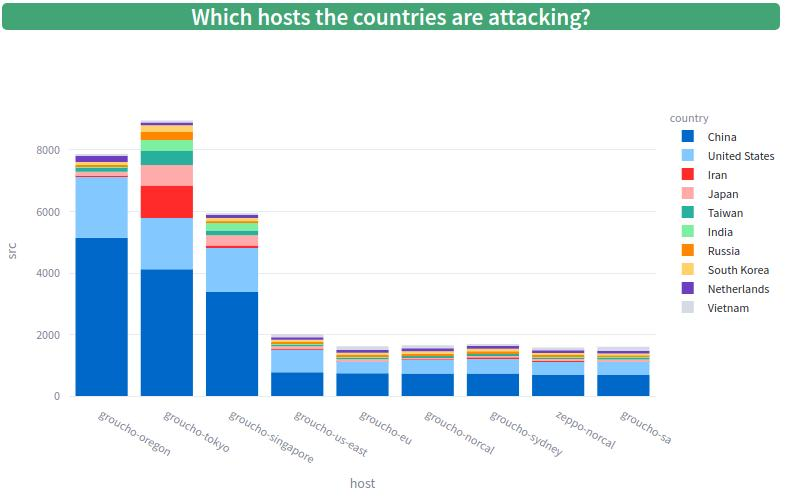

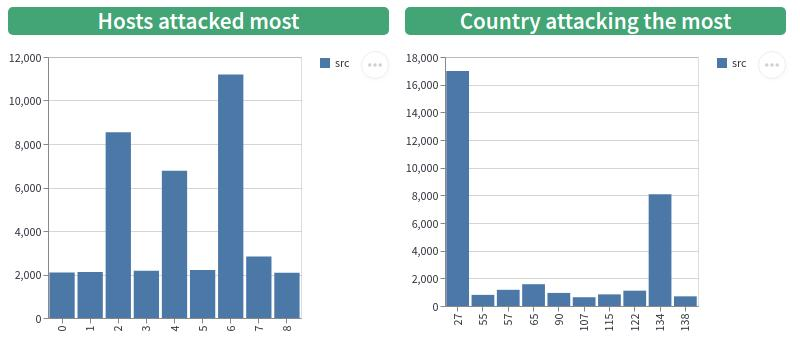

In [9]:
def getSQLiteData(query,credentials):
    data = pd.read_sql(query,con=credentials)
    return data

In [10]:
query1 = """SELECT * FROM hacker_data LIMIT 10"""

In [11]:
query1_data = getSQLiteData(query1,credentials=sqlite_conn)

In [13]:
type(query1_data)

pandas.core.frame.DataFrame

In [12]:
query1_data

,index,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude
0,0,7/9/13 6:08,groucho-sa,1017973657,TCP,unknown,6000.0,80.0,60.173.11.153,CN,China,Anhui Sheng,34,unknown,31.8639,117.2808
1,1,8/26/13 23:41,groucho-tokyo,2945632252,UDP,unknown,25416.0,56338.0,175.146.199.252,CN,China,Liaoning,21,unknown,41.7922,123.4328
2,2,8/26/13 23:59,groucho-tokyo,2945632252,UDP,unknown,25416.0,56338.0,175.146.199.252,CN,China,Liaoning,21,unknown,41.7922,123.4328
3,3,8/24/13 15:41,groucho-tokyo,3076878818,UDP,unknown,50785.0,20029.0,183.101.113.226,KR,South Korea,unknown,unknown,unknown,37.5700,126.9800
4,4,7/4/13 13:05,groucho-eu,3639888355,TCP,unknown,47672.0,3389.0,216.244.73.227,US,United States,Washington,WA,98168,47.4891,-122.2908
5,5,5/31/13 15:59,zeppo-norcal,3363543193,TCP,unknown,2539.0,445.0,200.123.152.153,AR,Argentina,Buenos Aires F.D.,C,unknown,-34.5875,-58.6725
6,6,8/11/13 8:38,groucho-us-east,1150395419,TCP,unknown,4955.0,80.0,68.145.164.27,CA,Canada,Alberta,AB,unknown,51.0833,-114.0833
7,7,9/2/13 13:35,groucho-oregon,3416049639,TCP,unknown,60702.0,1433.0,203.156.199.231,CN,China,unknown,unknown,unknown,35.0000,105.0000
8,8,5/30/13 5:02,groucho-oregon,710979555,TCP,unknown,6000.0,1433.0,42.96.175.227,CN,China,Beijing Shi,11,unknown,39.9289,116.3883
9,9,7/2/13 20:33,groucho-tokyo,620788592,UDP,unknown,5085.0,5060.0,37.0.123.112,RU,Russia,Moscow,MOW,unknown,55.7522,37.6156


In [14]:
query1_json = query1_data.to_json(orient ='records')

In [19]:
type(query1_json)

str

In [15]:
#This is a string object in python env
query1_json

'[{"index":0,"datetime":"7\\/9\\/13 6:08","host":"groucho-sa","src":1017973657,"proto":"TCP","type":"unknown","spt":6000.0,"dpt":80.0,"srcstr":"60.173.11.153","cc":"CN","country":"China","locale":"Anhui Sheng","localeabbr":"34","postalcode":"unknown","latitude":31.8639,"longitude":117.2808},{"index":1,"datetime":"8\\/26\\/13 23:41","host":"groucho-tokyo","src":2945632252,"proto":"UDP","type":"unknown","spt":25416.0,"dpt":56338.0,"srcstr":"175.146.199.252","cc":"CN","country":"China","locale":"Liaoning","localeabbr":"21","postalcode":"unknown","latitude":41.7922,"longitude":123.4328},{"index":2,"datetime":"8\\/26\\/13 23:59","host":"groucho-tokyo","src":2945632252,"proto":"UDP","type":"unknown","spt":25416.0,"dpt":56338.0,"srcstr":"175.146.199.252","cc":"CN","country":"China","locale":"Liaoning","localeabbr":"21","postalcode":"unknown","latitude":41.7922,"longitude":123.4328},{"index":3,"datetime":"8\\/24\\/13 15:41","host":"groucho-tokyo","src":3076878818,"proto":"UDP","type":"unknown"

In [16]:
import pprint
pprint.pprint(query1_json)

('[{"index":0,"datetime":"7\\/9\\/13 '
 '6:08","host":"groucho-sa","src":1017973657,"proto":"TCP","type":"unknown","spt":6000.0,"dpt":80.0,"srcstr":"60.173.11.153","cc":"CN","country":"China","locale":"Anhui '
 'Sheng","localeabbr":"34","postalcode":"unknown","latitude":31.8639,"longitude":117.2808},{"index":1,"datetime":"8\\/26\\/13 '
 '23:41","host":"groucho-tokyo","src":2945632252,"proto":"UDP","type":"unknown","spt":25416.0,"dpt":56338.0,"srcstr":"175.146.199.252","cc":"CN","country":"China","locale":"Liaoning","localeabbr":"21","postalcode":"unknown","latitude":41.7922,"longitude":123.4328},{"index":2,"datetime":"8\\/26\\/13 '
 '23:59","host":"groucho-tokyo","src":2945632252,"proto":"UDP","type":"unknown","spt":25416.0,"dpt":56338.0,"srcstr":"175.146.199.252","cc":"CN","country":"China","locale":"Liaoning","localeabbr":"21","postalcode":"unknown","latitude":41.7922,"longitude":123.4328},{"index":3,"datetime":"8\\/24\\/13 '
 '15:41","host":"groucho-tokyo","src":3076878818,"proto":"

In [18]:
query1_json[0]

'['

In [17]:
pprint.pprint(js.loads(query1_json)[0])

{'cc': 'CN',
 'country': 'China',
 'datetime': '7/9/13 6:08',
 'dpt': 80.0,
 'host': 'groucho-sa',
 'index': 0,
 'latitude': 31.8639,
 'locale': 'Anhui Sheng',
 'localeabbr': '34',
 'longitude': 117.2808,
 'postalcode': 'unknown',
 'proto': 'TCP',
 'spt': 6000.0,
 'src': 1017973657,
 'srcstr': '60.173.11.153',
 'type': 'unknown'}


In [20]:
with open('response_1678249961030.json','r') as tut:
    output = js.load(tut)
    print(type(output))
    print(output)

<class 'str'>
{
    "max_day": "Wednesday",
    "max_day_count": "2163",
    "max_month": "August",
    "max_month_count": "3060",
    "max_hour": "7",
    "max_hour_count": "1387"
}


In [21]:
query1_split = query1_data.to_json(orient ='split')
pprint.pprint(js.loads(query1_split)['columns'])

['index',
 'datetime',
 'host',
 'src',
 'proto',
 'type',
 'spt',
 'dpt',
 'srcstr',
 'cc',
 'country',
 'locale',
 'localeabbr',
 'postalcode',
 'latitude',
 'longitude']


In [22]:
pprint.pprint(js.loads(query1_split))

{'columns': ['index',
             'datetime',
             'host',
             'src',
             'proto',
             'type',
             'spt',
             'dpt',
             'srcstr',
             'cc',
             'country',
             'locale',
             'localeabbr',
             'postalcode',
             'latitude',
             'longitude'],
 'data': [[0,
           '7/9/13 6:08',
           'groucho-sa',
           1017973657,
           'TCP',
           'unknown',
           6000.0,
           80.0,
           '60.173.11.153',
           'CN',
           'China',
           'Anhui Sheng',
           '34',
           'unknown',
           31.8639,
           117.2808],
          [1,
           '8/26/13 23:41',
           'groucho-tokyo',
           2945632252,
           'UDP',
           'unknown',
           25416.0,
           56338.0,
           '175.146.199.252',
           'CN',
           'China',
           'Liaoning',
           '21',
           'unknow

In [25]:
query1_index = query1_data.to_json(orient ='index')
pprint.pprint(js.loads(query1_index)['2'])

{'cc': 'CN',
 'country': 'China',
 'datetime': '8/26/13 23:59',
 'dpt': 56338.0,
 'host': 'groucho-tokyo',
 'index': 2,
 'latitude': 41.7922,
 'locale': 'Liaoning',
 'localeabbr': '21',
 'longitude': 123.4328,
 'postalcode': 'unknown',
 'proto': 'UDP',
 'spt': 25416.0,
 'src': 2945632252,
 'srcstr': '175.146.199.252',
 'type': 'unknown'}


In [26]:
query1_columns = query1_data.to_json(orient ='columns')
pprint.pprint(js.loads(query1_columns))

{'cc': {'0': 'CN',
        '1': 'CN',
        '2': 'CN',
        '3': 'KR',
        '4': 'US',
        '5': 'AR',
        '6': 'CA',
        '7': 'CN',
        '8': 'CN',
        '9': 'RU'},
 'country': {'0': 'China',
             '1': 'China',
             '2': 'China',
             '3': 'South Korea',
             '4': 'United States',
             '5': 'Argentina',
             '6': 'Canada',
             '7': 'China',
             '8': 'China',
             '9': 'Russia'},
 'datetime': {'0': '7/9/13 6:08',
              '1': '8/26/13 23:41',
              '2': '8/26/13 23:59',
              '3': '8/24/13 15:41',
              '4': '7/4/13 13:05',
              '5': '5/31/13 15:59',
              '6': '8/11/13 8:38',
              '7': '9/2/13 13:35',
              '8': '5/30/13 5:02',
              '9': '7/2/13 20:33'},
 'dpt': {'0': 80.0,
         '1': 56338.0,
         '2': 56338.0,
         '3': 20029.0,
         '4': 3389.0,
         '5': 445.0,
         '6': 80.0,
         '7'

In [27]:
query1_values = query1_data.to_json(orient ='values')
pprint.pprint(query1_values)

('[[0,"7\\/9\\/13 '
 '6:08","groucho-sa",1017973657,"TCP","unknown",6000.0,80.0,"60.173.11.153","CN","China","Anhui '
 'Sheng","34","unknown",31.8639,117.2808],[1,"8\\/26\\/13 '
 '23:41","groucho-tokyo",2945632252,"UDP","unknown",25416.0,56338.0,"175.146.199.252","CN","China","Liaoning","21","unknown",41.7922,123.4328],[2,"8\\/26\\/13 '
 '23:59","groucho-tokyo",2945632252,"UDP","unknown",25416.0,56338.0,"175.146.199.252","CN","China","Liaoning","21","unknown",41.7922,123.4328],[3,"8\\/24\\/13 '
 '15:41","groucho-tokyo",3076878818,"UDP","unknown",50785.0,20029.0,"183.101.113.226","KR","South '
 'Korea","unknown","unknown","unknown",37.57,126.98],[4,"7\\/4\\/13 '
 '13:05","groucho-eu",3639888355,"TCP","unknown",47672.0,3389.0,"216.244.73.227","US","United '
 'States","Washington","WA","98168",47.4891,-122.2908],[5,"5\\/31\\/13 '
 '15:59","zeppo-norcal",3363543193,"TCP","unknown",2539.0,445.0,"200.123.152.153","AR","Argentina","Buenos '
 'Aires F.D.","C","unknown",-34.5875,-58.6725],[6,"8

In [28]:
#A very useful method for writing to NoSQL Databases
query1_table = query1_data.to_json(orient ='table')
pprint.pprint(query1_table)

('{"schema":{"fields":[{"name":"index","type":"integer"},{"name":"index","type":"integer"},{"name":"datetime","type":"string"},{"name":"host","type":"string"},{"name":"src","type":"integer"},{"name":"proto","type":"string"},{"name":"type","type":"string"},{"name":"spt","type":"number"},{"name":"dpt","type":"number"},{"name":"srcstr","type":"string"},{"name":"cc","type":"string"},{"name":"country","type":"string"},{"name":"locale","type":"string"},{"name":"localeabbr","type":"string"},{"name":"postalcode","type":"string"},{"name":"latitude","type":"number"},{"name":"longitude","type":"number"}],"primaryKey":["index"],"pandas_version":"1.4.0"},"data":[{"level_0":0,"index":0,"datetime":"7\\/9\\/13 '
 '6:08","host":"groucho-sa","src":1017973657,"proto":"TCP","type":"unknown","spt":6000.0,"dpt":80.0,"srcstr":"60.173.11.153","cc":"CN","country":"China","locale":"Anhui '
 'Sheng","localeabbr":"34","postalcode":"unknown","latitude":31.8639,"longitude":117.2808},{"level_0":1,"index":1,"datetime

### There are 2 ways to get the data for dashboad

1) SQL query Route

2) Pandas Dataframe Route

With the ease of pandas dataframe, groupby and index filtering the easiest route will be

1) Use Pandas dataframe route

2) Create new db table for data required in each dataframe

3) Query the table in seperate end points.

In [29]:
def clean_hackdata(raw_csv_file):
    
    raw_data = pd.read_csv(raw_csv_file)
    cleaned_data = raw_data.copy()
    cleaned_data['datetime_obj'] = cleaned_data.datetime.apply(
            lambda x : datetime.datetime.strptime(x,'%m/%d/%y %H:%M')
            )
    #making three more columns, month and day of week
    cleaned_data['day_week'] = cleaned_data.datetime_obj. \
                apply(lambda x: x.day_name())

    cleaned_data['month_name'] = cleaned_data.datetime_obj. \
                apply(lambda x: x.month_name())

    cleaned_data['week_year'] = cleaned_data.datetime_obj. \
                apply(lambda x: x.weekofyear)

    cleaned_data['incident_hour'] = cleaned_data.datetime_obj. \
                apply(lambda x: x.hour)
    #dropping the column
    cleaned_data.drop(['datetime','Unnamed: 0'],inplace=True,axis=1)
    #return the dataframe
    return cleaned_data

In [30]:
data_dir

'/home/solverbot/sample_data.csv'

In [31]:
cleaned_df = clean_hackdata(data_dir)

In [32]:
cleaned_df.head(2)

,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,datetime_obj,day_week,month_name,week_year,incident_hour
0,groucho-sa,1017973657,TCP,unknown,6000.0,80.0,60.173.11.153,CN,China,Anhui Sheng,34,unknown,31.8639,117.2808,2013-07-09 06:08:00,Tuesday,July,28,6
1,groucho-tokyo,2945632252,UDP,unknown,25416.0,56338.0,175.146.199.252,CN,China,Liaoning,21,unknown,41.7922,123.4328,2013-08-26 23:41:00,Monday,August,35,23


In [33]:
host_grp_count = group_by_col(cleaned_df,'host')
country_grp_count = group_by_col(cleaned_df,'country')
country_hst_grp = group_two_col(cleaned_df,'host','country')
country_top_10 = list(country_grp_count['country'].values)
country_top_10 = country_top_10[:10] 

#st.write(country_top_10)
country_host_filter = country_hst_grp[country_hst_grp.country.isin(country_top_10)]

In [34]:
conv_data = country_host_filter.to_json(orient ='records')
js.loads(conv_data)

[{'host': 'groucho-oregon', 'country': 'China', 'src': 5145},
 {'host': 'groucho-tokyo', 'country': 'China', 'src': 4121},
 {'host': 'groucho-singapore', 'country': 'China', 'src': 3384},
 {'host': 'groucho-oregon', 'country': 'United States', 'src': 2004},
 {'host': 'groucho-tokyo', 'country': 'United States', 'src': 1669},
 {'host': 'groucho-singapore', 'country': 'United States', 'src': 1444},
 {'host': 'groucho-tokyo', 'country': 'Iran', 'src': 1055},
 {'host': 'groucho-us-east', 'country': 'China', 'src': 776},
 {'host': 'groucho-us-east', 'country': 'United States', 'src': 739},
 {'host': 'groucho-eu', 'country': 'China', 'src': 736},
 {'host': 'groucho-norcal', 'country': 'China', 'src': 735},
 {'host': 'groucho-sydney', 'country': 'China', 'src': 729},
 {'host': 'zeppo-norcal', 'country': 'China', 'src': 685},
 {'host': 'groucho-sa', 'country': 'China', 'src': 681},
 {'host': 'groucho-tokyo', 'country': 'Japan', 'src': 663},
 {'host': 'groucho-sydney', 'country': 'United States

In [35]:
hosts = cleaned_df.host.unique()
hosts

array(['groucho-sa', 'groucho-tokyo', 'groucho-eu', 'zeppo-norcal',
       'groucho-us-east', 'groucho-oregon', 'groucho-singapore',
       'groucho-sydney', 'groucho-norcal'], dtype=object)

In [40]:
focus_host = hosts[5]
filter_host_df = cleaned_df[cleaned_df.host == focus_host]
#Which month, day, hour and week the max attack happend for the host 

#Lets get the grouped dataframes for the filtered dataframe
month_grp = group_by_col(filter_host_df,'month_name')
#st.dataframe(month_grp)
day_grp = group_by_col(filter_host_df,'day_week')
hour_grp = group_by_col(filter_host_df,'incident_hour')
week_grp = group_by_col(filter_host_df,'week_year')

In [41]:
week_grp

,week_year,src
3,12,405
6,15,374
17,26,356
7,16,352
13,22,352
16,25,348
15,24,344
19,28,339
24,33,339
4,13,336


In [39]:
max_month= month_grp.iloc[0,0] 
max_month_count = month_grp.iloc[0,1]

max_week = week_grp.iloc[0,0] 
max_week_count = week_grp.iloc[0,1]

max_day = day_grp.iloc[0,0] 
max_day_count = day_grp.iloc[0,1]

max_hour = hour_grp.iloc[0,0] 
max_hour_count = hour_grp.iloc[0,1]

# Server code

In [49]:
from fastapi import FastAPI, status
from fastapi.params import Body
from typing import List

In [50]:
query_server = FastAPI()

In [51]:
@query_server.get('/')
def default_route():
    return {"message":"serving data from hacker_data table"}

In [58]:
@query_server.get('/query_data')
def query_data():
    """The function returns the 10 records 
    in the hacker_data table"""
    query1 = """SELECT * FROM hacker_data LIMIT 10"""
    query1_data = getSQLiteData(query1,credentials=sqlite_conn)
    query1_json = query1_data.to_json(orient ='records')
    #we are loading the json object from string object below
    print(js.loads(query1_json))
    return js.loads(query1_json)

In [54]:
def unique_info(cleaned_df):
    incidents = cleaned_df.shape[0]
    hosts = len(cleaned_df.host.unique())
    attackers = len(cleaned_df.srcstr.unique())
    countries = len(cleaned_df.country.unique())
    
    dict_form = {'incidents':incidents,'hosts':hosts,
                 'attackers':attackers,'countries':countries}
    #if you want to dump the python object into a string then use dumps
    return js.dumps(dict_form)
    #if you want to dump the python object into a file then use dump

In [55]:
unique_info(cleaned_df)

'{"incidents": 40000, "hosts": 9, "attackers": 17476, "countries": 142}'

In [57]:
to_dump_file = unique_info(cleaned_df)
with open('a_new_file.txt','w') as wp:
    js.dump(obj=to_dump_file,fp=wp)

@query_server.get('/query_data')
def query_data():
    """The function returns the 10 records 
    in the hacker_data table"""
    query1 = """SELECT * FROM hacker_data LIMIT 10"""
    query1_data = getSQLiteData(query1,credentials=sqlite_conn)


In [59]:
@query_server.get('/country_host')
def country_host_count():
    conv_data = country_host_filter.to_json(orient ='records')
    return js.loads(conv_data)

In [60]:
@query_server.get('/host_count')
def host_count():
    host_data = host_grp_count.to_json(orient='records')
    return js.loads(host_data)

In [61]:
@query_server.get('/attack_by')
def country_count():
    country_data = country_grp_count.to_json(orient='records')
    return js.loads(country_data)

In [62]:
@query_server.get('/show_hosts')
def host_show():
    print(js.dumps({'hosts':list(hosts)},indent=4))
    return js.dumps({'hosts':list(hosts)})

In [63]:
print(js.dumps({'hosts':[str(hst) for hst in hosts]},indent=4))

{
    "hosts": [
        "groucho-sa",
        "groucho-tokyo",
        "groucho-eu",
        "zeppo-norcal",
        "groucho-us-east",
        "groucho-oregon",
        "groucho-singapore",
        "groucho-sydney",
        "groucho-norcal"
    ]
}


In [64]:
@query_server.get('/unique_info')
def unique_show():
    incidents = cleaned_df.shape[0]
    hosts = len(cleaned_df.host.unique())
    attackers = len(cleaned_df.srcstr.unique())
    countries = len(cleaned_df.country.unique())
    dict_form = {'incidents':incidents,'hosts':hosts,
                 'attackers':attackers,'countries':countries}
    print(js.dumps(dict_form,indent=4))
    return js.dumps(dict_form,indent=4)

In [67]:
week_grp.iloc[0,0]

12

In [68]:
type(week_grp.iloc[0,0])

numpy.int64

In [69]:
@query_server.get('/filter_host')
def filter_host(your_host:str):
    print(your_host)
    filter_host_df = cleaned_df[cleaned_df.host == your_host]
    #Which month, day, hour and week the max attack happend for the host 
    #Lets get the grouped dataframes for the filtered dataframe
    month_grp = group_by_col(filter_host_df,'month_name')
    #st.dataframe(month_grp)
    day_grp = group_by_col(filter_host_df,'day_week')
    hour_grp = group_by_col(filter_host_df,'incident_hour')
    week_grp = group_by_col(filter_host_df,'week_year')

    max_month= month_grp.iloc[0,0]
    max_month_count = int(month_grp.iloc[0,1])

    max_week = int(week_grp.iloc[0,0]) 
    max_week_count = int(week_grp.iloc[0,1])

    max_day = day_grp.iloc[0,0] 
    max_day_count = int(day_grp.iloc[0,1])

    max_hour = int(hour_grp.iloc[0,0]) 
    max_hour_count = int(hour_grp.iloc[0,1])
    
    dict_form  = {"max_day":max_day,"max_day_count":max_day_count,
                 "max_month":max_month,"max_month_count":max_month_count,
                 "max_hour":max_hour,"max_hour_count":max_hour_count,
                 "max_month":max_month,"max_month_count":max_month_count}
    #print(js.dumps(dict_form,indent=4))
    return js.dumps(dict_form)

In [ ]:
import nest_asyncio
import uvicorn

if __name__ == "__main__":
    nest_asyncio.apply()
    uvicorn.run(query_server)

INFO:     Started server process [86572]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:33216 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:33228 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:33228 - "GET /openapi.json HTTP/1.1" 200 OK
[{'index': 0, 'datetime': '7/9/13 6:08', 'host': 'groucho-sa', 'src': 1017973657, 'proto': 'TCP', 'type': 'unknown', 'spt': 6000.0, 'dpt': 80.0, 'srcstr': '60.173.11.153', 'cc': 'CN', 'country': 'China', 'locale': 'Anhui Sheng', 'localeabbr': '34', 'postalcode': 'unknown', 'latitude': 31.8639, 'longitude': 117.2808}, {'index': 1, 'datetime': '8/26/13 23:41', 'host': 'groucho-tokyo', 'src': 2945632252, 'proto': 'UDP', 'type': 'unknown', 'spt': 25416.0, 'dpt': 56338.0, 'srcstr': '175.146.199.252', 'cc': 'CN', 'country': 'China', 'locale': 'Liaoning', 'localeabbr': '21', 'postalcode': 'unknown', 'latitude': 41.7922, 'longitude': 123.4328}, {'index': 2, 'datetime': '8/26/13 23:59', 'host': 'groucho-tokyo', 'src': 2945632252, 'proto': 'UDP', 'type': 'unknown', 'spt': 25416.0, 'dpt': 56338.0, 'srcstr': '175.146.199.252', '